# Feature Scaling

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [40]:
Xt, yt = load_house_data()
print(Xt)
X_predictors = ['size(sqft)','bedrooms','floors','age']

[[1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01]
 [7.88e+02 2.00e+00 1.00e+00 8.00e+01]
 [1.20e+03 2.00e+00 2.00e+00 1.70e+01]
 [1.56e+03 2.00e+00 1.00e+00 1.80e+01]
 [1.43e+03 3.00e+00 1.00e+00 2.00e+01]
 [1.22e+03 2.00e+00 1.00e+00 1.50e+01]
 [1.09e+03 2.00e+00 1.00e+00 6.40e+01]
 [8.48e+02 1.00e+00 1.00e+00 1.70e+01]
 [1.68e+03 3.00e+00 2.00e+00 2.30e+01]
 [1.77e+03 3.00e+00 2.00e+00 1.80e+01]
 [1.04e+03 3.00e+00 1.00e+00 4.40e+01]
 [1.65e+03 2.00e+00 1.00e+00 2.10e+01]
 [1.09e+03 2.00e+00 1.00e+00 3.50e+01]
 [1.32e+03 3.00e+00 1.00e+00 1.40e+01]
 [1.59e+03 0.00e+00 1.00e+00 2.00e+01]
 [9.72e+02 2.00e+00 1.00e+00 7.30e+01]
 [1.10e+03 3.00e+00 1.00e+00 3.70e+01]
 [1.00e+03 2.00e+00 1.00e

Plot : Scatterplot relationship between dataset and features

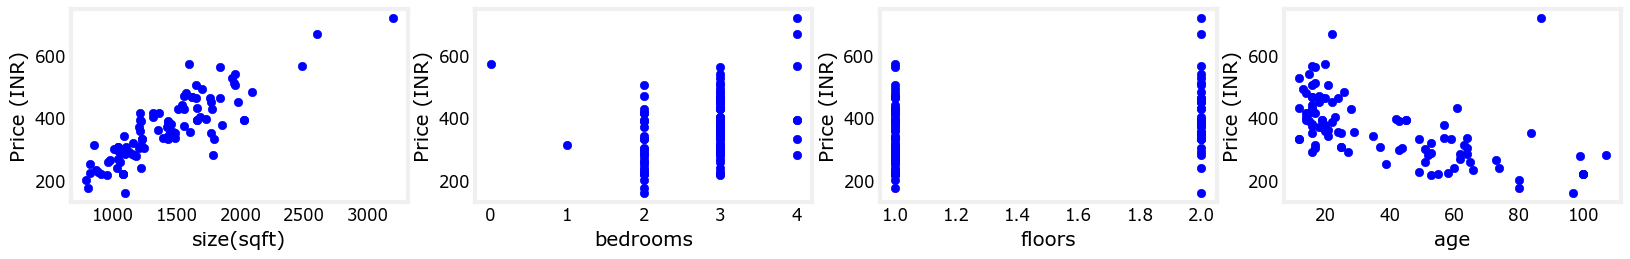

In [41]:
fig,ax=plt.subplots(1, 4, figsize=(20, 2.5))
for i in range(len(X_predictors)):
#  print(len(Xt[:,i]))
#  print(len(yt))
 ax[i].scatter(Xt[:,i],yt,marker='o',c='b')
 ax[i].set_xlabel(X_predictors[i])
 ax[i].set_ylabel('Price (INR)')

Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min}$

z-score normalization: $x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$ 

In [59]:
Xt_mu = np.mean(Xt, axis=0) 
Xt_max = np.max(Xt, axis=0)
Xt_min = np.min(Xt, axis=0)
Xt_sigma  = np.std(Xt, axis=0) 
Xt_sub_mu=Xt-Xt_mu

Xt_mean_normalized=(Xt-Xt_mu)/(Xt_max-Xt_min)
Xt_zscore_normalized=(Xt-Xt_mu)/(Xt_sigma)
#print(Xt_mean_normalized)
print(Xt_mu)
print(Xt_max)
print(Xt_min)
print(X_predictors)


[1.42e+03 2.72e+00 1.38e+00 3.84e+01]
[3.19e+03 4.00e+00 2.00e+00 1.07e+02]
[788.   0.   1.  12.]
['size(sqft)', 'bedrooms', 'floors', 'age']


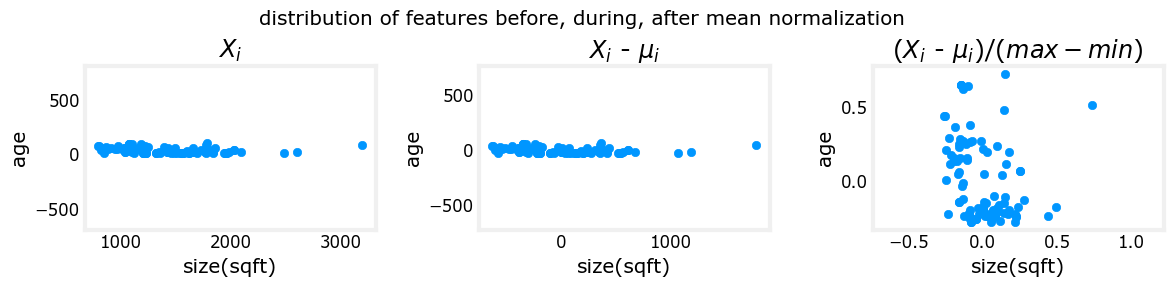

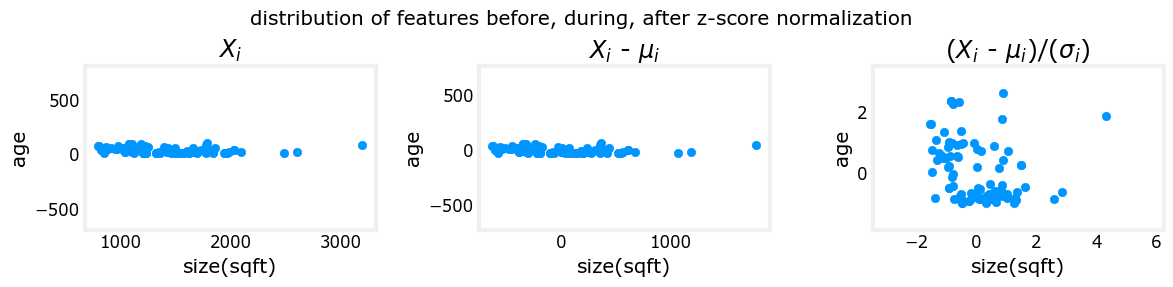

In [68]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(Xt[:,0], Xt[:,3])
ax[0].set_xlabel(X_predictors [0]); ax[0].set_ylabel(X_predictors[3]);
ax[0].set_title("$X_i$")
ax[0].axis('equal')

ax[1].scatter(Xt_sub_mu[:,0], Xt_sub_mu[:,3])
ax[1].set_xlabel(X_predictors [0]); ax[1].set_ylabel(X_predictors[3]);
ax[1].set_title(r"$X_i$ - $\mu_i$")
ax[1].axis('equal')

ax[2].scatter(Xt_mean_normalized[:,0], Xt_mean_normalized[:,3])
ax[2].set_xlabel(X_predictors [0]); ax[2].set_ylabel(X_predictors [3]);
ax[2].set_title(r"($X_i$ - $\mu_i$)/($max-min$)")#ax[2].set_title(r"(X - $\mu$)/$\sigma$")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after mean normalization")
plt.show()

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(Xt[:,0], Xt[:,3])
ax[0].set_xlabel(X_predictors [0]); ax[0].set_ylabel(X_predictors[3]);
ax[0].set_title("$X_i$")
ax[0].axis('equal')

ax[1].scatter(Xt_sub_mu[:,0], Xt_sub_mu[:,3])
ax[1].set_xlabel(X_predictors [0]); ax[1].set_ylabel(X_predictors [3]);
ax[1].set_title(r"$X_i$ - $\mu_i$")
ax[1].axis('equal')

ax[2].scatter(Xt_zscore_normalized[:,0], Xt_zscore_normalized[:,3])
ax[2].set_xlabel(X_predictors [0]); ax[2].set_ylabel(X_predictors [3]);
ax[2].set_title(r"($X_i$ - $\mu_i$)/($\sigma_i$)")#ax[2].set_title(r"(X - $\mu$)/$\sigma$")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after z-score normalization")
plt.show()

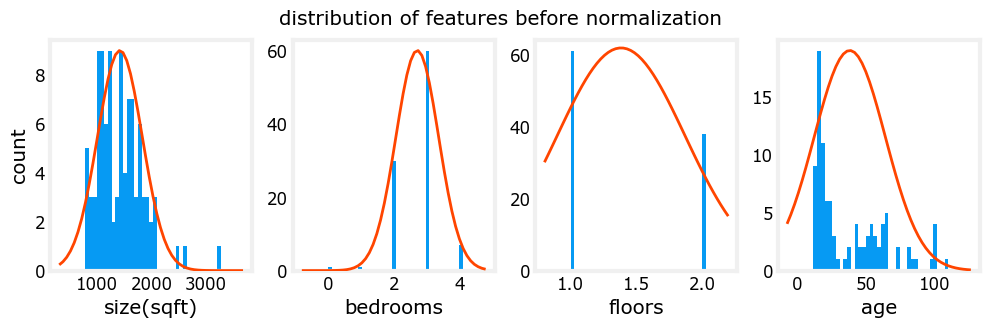

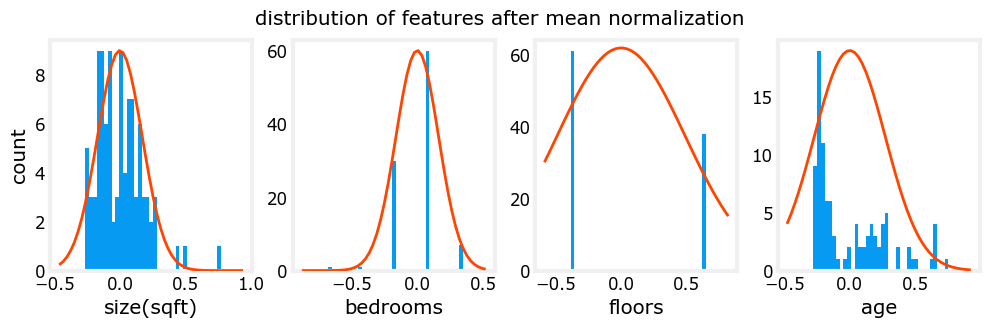

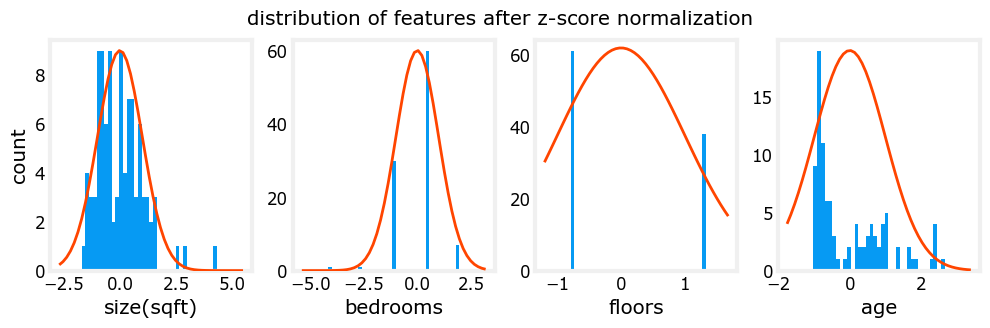

In [70]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],Xt[:,i],)
    ax[i].set_xlabel(X_predictors[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],Xt_mean_normalized[:,i],)
    ax[i].set_xlabel(X_predictors[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after mean normalization")
plt.show()

fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],Xt_zscore_normalized[:,i],)
    ax[i].set_xlabel(X_predictors[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after z-score normalization")
plt.show()